In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!gdown 1NsNtQGskW6YES59izIz9Ntj6Owxcspja
!jar xf "RData.zip"
!rm -r "RData.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1NsNtQGskW6YES59izIz9Ntj6Owxcspja
From (redirected): https://drive.google.com/uc?id=1NsNtQGskW6YES59izIz9Ntj6Owxcspja&confirm=t&uuid=e13307ca-133f-4e7b-a5e7-11c4ead72e75
To: /content/RData.zip
100% 93.7M/93.7M [00:05<00:00, 18.3MB/s]


In [12]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00


 **Road Anomalies**



Data plot visualization



In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/Data/RoadAnomalies/Pothole4/MagnetometerUncalibrated.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Create the figure
fig = go.Figure()

# Add traces for each axis
for axis in ['x', 'y', 'z']:
    fig.add_trace(go.Scatter(x=df.index, y=df[axis], name=axis))

# Update the layout to include a title
fig.update_layout(
    title='Magnetometer Uncalibrated',
    xaxis_title='Time',
    yaxis_title='Magnetometer',
    legend_title='Axis'
)

# Show the figure
fig.show()

# Save the figure as a PNG file
fig.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Road_Anomalies/Data_plot_visualization/Pothole/MagnetometerUncalibrated.png')


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/Data/RoadAnomalies/Pothole4/Location.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Create the figure
fig = go.Figure()

# Add traces for each axis
for axis in ['bearingAccuracy', 'speedAccuracy', 'verticalAccuracy', 'horizontalAccuracy', 'speed', 'bearing', 'altitude', 'longitude', 'latitude']:
    fig.add_trace(go.Scatter(x=df.index, y=df[axis], name=axis))

# Update the layout to include a title
fig.update_layout(
    title='GPS',
    xaxis_title='Time',
    yaxis_title='GPS Data',
    legend_title='Axis'
)

# Show the figure
fig.show()

# Save the figure as a PNG file
fig.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Road_Anomalies/Data_plot_visualization/Pothole/GPS.png')


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/Data/RoadAnomalies/Pothole4/Orientation.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Create the figure
fig = go.Figure()

# Add traces for each axis
for axis in ['qz', 'qy', 'qx', 'qw', 'roll', 'pitch', 'yaw']:
    fig.add_trace(go.Scatter(x=df.index, y=df[axis], name=axis))

# Update the layout to include a title
fig.update_layout(
    title='Orientation',
    xaxis_title='Time',
    yaxis_title='Orientation',
    legend_title='Axis'
)

# Show the figure
fig.show()

# Save the figure as a PNG file
fig.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Road_Anomalies/Data_plot_visualization/Pothole/Orientation.png')


Statistical Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# File paths for accelerometer data
filename_pothole = r"/content/Data/RoadAnomalies/Pothole4/Accelerometer.csv"
filename_bump = r"/content/Data/RoadAnomalies/Bump3/Accelerometer.csv"

# Output directory
output_dir = r'/content/drive/MyDrive/Road_Data/Output_Images/Road_Anomalies/Statistical_Validation'
os.makedirs(output_dir, exist_ok=True)

# Function to load data and return accelerometer readings for the z-axis
def load_accelerometer_data_z(filename):
    df = pd.read_csv(filename)
    return df['z']  # Assuming 'z' column exists

# Function to compute descriptive statistics
def compute_descriptive_statistics(data):
    mean_value = data.mean()
    variance_value = data.var()
    range_value = data.max() - data.min()
    std_deviation_value = data.std()

    return mean_value, variance_value, range_value, std_deviation_value

# Load z-axis accelerometer data for pothole and bump
accel_data_pothole_z = load_accelerometer_data_z(filename_pothole)
accel_data_bump_z = load_accelerometer_data_z(filename_bump)

# Make lengths equal by truncating the longer dataset
min_length = min(len(accel_data_pothole_z), len(accel_data_bump_z))
accel_data_pothole_z = accel_data_pothole_z[:min_length]
accel_data_bump_z = accel_data_bump_z[:min_length]

# Compute descriptive statistics for pothole
pothole_mean, pothole_var, pothole_range, pothole_std = compute_descriptive_statistics(accel_data_pothole_z)
print("Pothole Z-Axis Descriptive Statistics:")
print(f"Mean: {pothole_mean}")
print(f"Variance: {pothole_var}")
print(f"Range: {pothole_range}")
print(f"Standard Deviation: {pothole_std}\n")

# Compute descriptive statistics for bump
bump_mean, bump_var, bump_range, bump_std = compute_descriptive_statistics(accel_data_bump_z)
print("Bump Z-Axis Descriptive Statistics:")
print(f"Mean: {bump_mean}")
print(f"Variance: {bump_var}")
print(f"Range: {bump_range}")
print(f"Standard Deviation: {bump_std}\n")

# Perform T-test between pothole and bump data for z-axis
t_statistic, p_value = stats.ttest_ind(accel_data_pothole_z, accel_data_bump_z)
print(f"T-test Result (Pothole vs Bump Z-Axis):")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}\n")

# Histogram for z-axis data
plt.figure(figsize=(12, 6))
plt.hist(accel_data_pothole_z, bins=30, alpha=0.5, label='Pothole Z-Axis')
plt.hist(accel_data_bump_z, bins=30, alpha=0.5, label='Bump Z-Axis')
plt.title('Histogram of Accelerometer Z-Axis Data')
plt.xlabel('Acceleration (m/s²)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig(os.path.join(output_dir, 'histogram_z_axis.png'))
plt.close()

# Boxplot for z-axis data
plt.figure(figsize=(8, 6))
plt.boxplot([accel_data_pothole_z, accel_data_bump_z], labels=['Pothole Z-Axis', 'Bump Z-Axis'])
plt.title('Boxplot of Accelerometer Z-Axis Data')
plt.ylabel('Acceleration (m/s²)')
plt.savefig(os.path.join(output_dir, 'boxplot_z_axis.png'))
plt.close()

# Load data for cross-correlation
data1 = pd.read_csv(filename_pothole)
data2 = pd.read_csv(filename_bump)

# Extract Z-axis readings
signal1 = data1['z'].values
signal2 = data2['z'].values

# Compute cross-correlation
cross_corr = np.correlate(signal1, signal2, mode='full')
lags = np.arange(-len(signal2) + 1, len(signal1))

# Find the maximum cross-correlation value and the corresponding lag
max_corr = np.max(cross_corr)
max_corr_lag = lags[np.argmax(cross_corr)]

print(f"Maximum Cross-correlation Value: {max_corr}")
print(f"Lag at Maximum Cross-correlation Value: {max_corr_lag}\n")

# Plot signals and cross-correlation
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot signal 1
ax1.plot(np.arange(0, len(signal1)), signal1, label='Pothole - Accelerometer Z axis Signal', color='blue')
# Plot signal 2
ax1.plot(np.arange(0, len(signal2)), signal2, label='Bump - Accelerometer Z axis Signal', color='orange')
ax1.set_xlabel('Sample')
ax1.set_ylabel('Signal Amplitude')
ax1.legend(loc='upper left')

# Creating a secondary y-axis to plot cross-correlation
ax2 = ax1.twinx()
# Plotting cross-correlation with correct lags
ax2.plot(lags, cross_corr, label='Cross-correlation', color='green')
ax2.set_ylabel('Cross-correlation')
ax2.legend(loc='upper right')

plt.title('Z-Axis Signals and Cross-correlation')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'signals_and_cross_correlation.png'))
plt.close()


Pothole Z-Axis Descriptive Statistics:
Mean: -0.3167694991519566
Variance: 2.4728694917256124
Range: 11.776364803314209
Standard Deviation: 1.5725360064957534

Bump Z-Axis Descriptive Statistics:
Mean: -0.03446881822659053
Variance: 1.7980440933050519
Range: 8.812745094299316
Standard Deviation: 1.3409116649895518

T-test Result (Pothole vs Bump Z-Axis):
T-Statistic: -3.34879659610622
P-Value: 0.000836829346183308

Maximum Cross-correlation Value: 535.0153109986531
Lag at Maximum Cross-correlation Value: -95



Analyzing Driving Behavior

Data plot visualization

In [6]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/Data/DrivingBehaviour/Slow/Accelerometer.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Create the figure
fig = go.Figure()

# Add traces for each axis
for axis in ['x', 'y', 'z']:
    fig.add_trace(go.Scatter(x=df.index, y=df[axis], name=axis))

# Update the layout to include a title
fig.update_layout(
    title='Slow Driving - Accelerometer',
    xaxis_title='Time',
    yaxis_title='Acceleration',
    legend_title='Axis'
)

# Show the figure
fig.show()

# Save the figure as a PNG file
fig.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_slow.png')


FileNotFoundError: [Errno 2] No such file or directory: '/content/Data/DrivingBehaviour/Slow/Accelerometer.csv'

In [3]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/RData/DrivingBehaviour/5.Slow/Accelerometer.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Define colors for each axis
colors = {'x': 'blue', 'y': 'orange', 'z': 'green'}

# Create separate figures for each axis
fig_x = go.Figure()
fig_y = go.Figure()
fig_z = go.Figure()

# Add traces for each axis with specified colors
fig_x.add_trace(go.Scatter(x=df.index, y=df['x'], name='X Axis', line=dict(color=colors['x'])))
fig_y.add_trace(go.Scatter(x=df.index, y=df['y'], name='Y Axis', line=dict(color=colors['y'])))
fig_z.add_trace(go.Scatter(x=df.index, y=df['z'], name='Z Axis', line=dict(color=colors['z'])))

# Update the layout for each figure
for fig, axis_name in zip([fig_x, fig_y, fig_z], ['X', 'Y', 'Z']):
    fig.update_layout(
        title=f'Slow Driving - Accelerometer {axis_name} Axis',
        xaxis_title='Time',
        yaxis_title='Acceleration',
        legend_title='Axis'
    )

# Show each figure in a separate window
fig_x.show()
fig_y.show()
fig_z.show()

# Save each figure as a PNG file
fig_x.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_slow_x.png')
fig_y.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_slow_y.png')
fig_z.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_slow_z.png')


Output hidden; open in https://colab.research.google.com to view.

In [4]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/RData/DrivingBehaviour/5.Slow/Accelerometer.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Define the start and end times for filtering (update these to your desired range)
start_time = '2023-10-10 18:22:00'  # Replace with your start time
end_time = '2023-10-10 18:23:00'    # Replace with your end time

# Filter the DataFrame to include only the desired time range
df_filtered = df[start_time:end_time]

# Define colors for each axis
colors = {'x': 'blue', 'y': 'orange', 'z': 'green'}

# Create separate figures for each axis
fig_x = go.Figure()
fig_y = go.Figure()
fig_z = go.Figure()

# Add traces for each axis with specified colors
fig_x.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['x'], name='X Axis', line=dict(color=colors['x'])))
fig_y.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['y'], name='Y Axis', line=dict(color=colors['y'])))
fig_z.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['z'], name='Z Axis', line=dict(color=colors['z'])))

# Update the layout for each figure
for fig, axis_name in zip([fig_x, fig_y, fig_z], ['X', 'Y', 'Z']):
    fig.update_layout(
        title=f'Slow Driving - Accelerometer {axis_name} Axis',
        xaxis_title='Time',
        yaxis_title='Acceleration',
        legend_title='Axis'
    )

# Show each figure in a separate window
fig_x.show()
fig_y.show()
fig_z.show()

# Save each figure as a PNG file
fig_x.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_slow_x.png')
fig_y.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_slow_y.png')
fig_z.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_slow_z.png')


In [5]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/RData/DrivingBehaviour/1.Aggressive/Accelerometer.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Define colors for each axis
colors = {'x': 'blue', 'y': 'orange', 'z': 'green'}

# Create separate figures for each axis
fig_x = go.Figure()
fig_y = go.Figure()
fig_z = go.Figure()

# Add traces for each axis with specified colors
fig_x.add_trace(go.Scatter(x=df.index, y=df['x'], name='X Axis', line=dict(color=colors['x'])))
fig_y.add_trace(go.Scatter(x=df.index, y=df['y'], name='Y Axis', line=dict(color=colors['y'])))
fig_z.add_trace(go.Scatter(x=df.index, y=df['z'], name='Z Axis', line=dict(color=colors['z'])))

# Update the layout for each figure
for fig, axis_name in zip([fig_x, fig_y, fig_z], ['X', 'Y', 'Z']):
    fig.update_layout(
        title=f'Aggressive Driving - Accelerometer {axis_name} Axis',
        xaxis_title='Time',
        yaxis_title='Acceleration',
        legend_title='Axis'
    )

# Show each figure in a separate window
fig_x.show()
fig_y.show()
fig_z.show()

# Save each figure as a PNG file
fig_x.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Aggressive_x.png')
fig_y.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Aggressive_y.png')
fig_z.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Aggressive_z.png')


Output hidden; open in https://colab.research.google.com to view.

In [6]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/RData/DrivingBehaviour/1.Aggressive/Accelerometer.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Define the start and end times for filtering (update these to your desired range)
start_time = '2023-10-10 18:17:00'  # Replace with your start time
end_time = '2023-10-10 18:18:00'    # Replace with your end time

# Filter the DataFrame to include only the desired time range
df_filtered = df[start_time:end_time]

# Define colors for each axis
colors = {'x': 'blue', 'y': 'orange', 'z': 'green'}

# Create separate figures for each axis
fig_x = go.Figure()
fig_y = go.Figure()
fig_z = go.Figure()

# Add traces for each axis with specified colors
fig_x.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['x'], name='X Axis', line=dict(color=colors['x'])))
fig_y.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['y'], name='Y Axis', line=dict(color=colors['y'])))
fig_z.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['z'], name='Z Axis', line=dict(color=colors['z'])))

# Update the layout for each figure
for fig, axis_name in zip([fig_x, fig_y, fig_z], ['X', 'Y', 'Z']):
    fig.update_layout(
        title=f'Aggressive Driving - Accelerometer {axis_name} Axis',
        xaxis_title='Time',
        yaxis_title='Acceleration',
        legend_title='Axis'
    )

# Show each figure in a separate window
fig_x.show()
fig_y.show()
fig_z.show()

# Save each figure as a PNG file
fig_x.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Aggressive_x.png')
fig_y.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Aggressive_y.png')
fig_z.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Aggressive_z.png')


In [7]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/RData/DrivingBehaviour/3.Standard/Accelerometer.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Define colors for each axis
colors = {'x': 'blue', 'y': 'orange', 'z': 'green'}

# Create separate figures for each axis
fig_x = go.Figure()
fig_y = go.Figure()
fig_z = go.Figure()

# Add traces for each axis with specified colors
fig_x.add_trace(go.Scatter(x=df.index, y=df['x'], name='X Axis', line=dict(color=colors['x'])))
fig_y.add_trace(go.Scatter(x=df.index, y=df['y'], name='Y Axis', line=dict(color=colors['y'])))
fig_z.add_trace(go.Scatter(x=df.index, y=df['z'], name='Z Axis', line=dict(color=colors['z'])))

# Update the layout for each figure
for fig, axis_name in zip([fig_x, fig_y, fig_z], ['X', 'Y', 'Z']):
    fig.update_layout(
        title=f'Standard Driving - Accelerometer {axis_name} Axis',
        xaxis_title='Time',
        yaxis_title='Acceleration',
        legend_title='Axis'
    )

# Show each figure in a separate window
fig_x.show()
fig_y.show()
fig_z.show()

# Save each figure as a PNG file
fig_x.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Standard_x.png')
fig_y.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Standard_y.png')
fig_z.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Standard_z.png')


Output hidden; open in https://colab.research.google.com to view.

In [9]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/RData/DrivingBehaviour/3.Standard/Accelerometer.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

# Define the start and end times for filtering (update these to your desired range)
start_time = '2023-10-10 18:12:00'  # Replace with your start time
end_time = '2023-10-10 18:13:00'    # Replace with your end time

# Filter the DataFrame to include only the desired time range
df_filtered = df[start_time:end_time]

# Define colors for each axis
colors = {'x': 'blue', 'y': 'orange', 'z': 'green'}

# Create separate figures for each axis
fig_x = go.Figure()
fig_y = go.Figure()
fig_z = go.Figure()

# Add traces for each axis with specified colors
fig_x.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['x'], name='X Axis', line=dict(color=colors['x'])))
fig_y.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['y'], name='Y Axis', line=dict(color=colors['y'])))
fig_z.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['z'], name='Z Axis', line=dict(color=colors['z'])))

# Update the layout for each figure
for fig, axis_name in zip([fig_x, fig_y, fig_z], ['X', 'Y', 'Z']):
    fig.update_layout(
        title=f'Standard Driving - Accelerometer {axis_name} Axis',
        xaxis_title='Time',
        yaxis_title='Acceleration',
        legend_title='Axis'
    )

# Show each figure in a separate window
fig_x.show()
fig_y.show()
fig_z.show()

# Save each figure as a PNG file
fig_x.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Standard_x.png')
fig_y.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Standard_y.png')
fig_z.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/Accelerometer_Standard_z.png')


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/Data/DrivingBehaviour/Aggressive_2/AccelerometerUncalibrated.csv')

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'], unit='ns')

# Set 'time' as the index
df.set_index('time', inplace=True)

# Filter the data to include only up to 11:59
df_filtered = df[df.index.time <= pd.to_datetime('11:59').time()]

# Create the figure
fig = go.Figure()

# Add traces for each axis
for axis in ['x', 'y', 'z']:
    fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered[axis], name=axis))

# Update the layout to include a title
fig.update_layout(
    title='Aggressive Driving-Accelerometer Uncalibrated',
    xaxis_title='Time',
    yaxis_title='Acceleration',
    legend_title='Axis'
)

# Show the figure
fig.show()

# Save the figure as a PNG file
fig.write_image('/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Data_plot_visualization/AccelerometerUncalibrated_aggressive.png')


Output hidden; open in https://colab.research.google.com to view.

Statistical Analysis

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# File paths for accelerometer data
filename_rush = r"/content/Data/DrivingBehaviour/Aggressive_2/Accelerometer.csv"
filename_normal = r"/content/Data/DrivingBehaviour/Normal/Accelerometer.csv"
filename_slow = r"/content/Data/DrivingBehaviour/Slow/Accelerometer.csv"

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Load accelerometer data
data_rush = load_data(filename_rush)
data_normal = load_data(filename_normal)
data_slow = load_data(filename_slow)

# Function to clean slow driving data
def clean_slow_data(data, column='x', lower_limit=-1.5, upper_limit=1.5):
    # Remove data points outside the specified limits
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# Clean slow driving data
data_slow = clean_slow_data(data_slow)

# Function to compute descriptive statistics
def compute_descriptive_statistics(data):
    mean_value = data.mean()
    variance_value = data.var()
    range_value = data.max() - data.min()
    std_deviation_value = data.std()
    return mean_value, variance_value, range_value, std_deviation_value

# Compute descriptive statistics for each driving behavior
def compute_statistics_for_data(data, label):
    mean_value, variance_value, range_value, std_deviation_value = compute_descriptive_statistics(data)
    print(f"{label} X-Axis Descriptive Statistics:")
    print(f"Mean: {mean_value}")
    print(f"Variance: {variance_value}")
    print(f"Range: {range_value}")
    print(f"Standard Deviation: {std_deviation_value}\n")

compute_statistics_for_data(data_rush['x'], 'Aggressive Driving')
compute_statistics_for_data(data_normal['x'], 'Normal Driving')
compute_statistics_for_data(data_slow['x'], 'Slow Driving')

# Function to perform t-tests
def perform_ttest(data1, data2, label1, label2):
    t_statistic, p_value = stats.ttest_ind(data1, data2)
    print(f"T-test Result ({label1} vs {label2}):")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}\n")
    return t_statistic, p_value

# Perform t-tests between aggressive vs slow, aggressive vs normal, and slow vs normal
perform_ttest(data_rush['x'], data_slow['x'], 'Aggressive Driving', 'Slow Driving')
perform_ttest(data_rush['x'], data_normal['x'], 'Aggressive Driving', 'Normal Driving')
perform_ttest(data_slow['x'], data_normal['x'], 'Slow Driving', 'Normal Driving')


Aggressive Driving X-Axis Descriptive Statistics:
Mean: -0.04545067849395086
Variance: 3.060968710420123
Range: 50.52932167053223
Standard Deviation: 1.7495624339874594

Normal Driving X-Axis Descriptive Statistics:
Mean: 0.027933612509054358
Variance: 0.45136586463153344
Range: 6.005551815032959
Standard Deviation: 0.671837677293804

Slow Driving X-Axis Descriptive Statistics:
Mean: 0.01916206684608401
Variance: 0.14347743830353496
Range: 2.9930944442749023
Standard Deviation: 0.37878415793633047

T-test Result (Aggressive Driving vs Slow Driving):
T-Statistic: -8.182252660266528
P-Value: 2.820286001941921e-16

T-test Result (Aggressive Driving vs Normal Driving):
T-Statistic: -5.81357231582057
P-Value: 6.144955938493559e-09

T-test Result (Slow Driving vs Normal Driving):
T-Statistic: -2.216874929916483
P-Value: 0.026634728481319935



(-2.216874929916483, 0.026634728481319935)

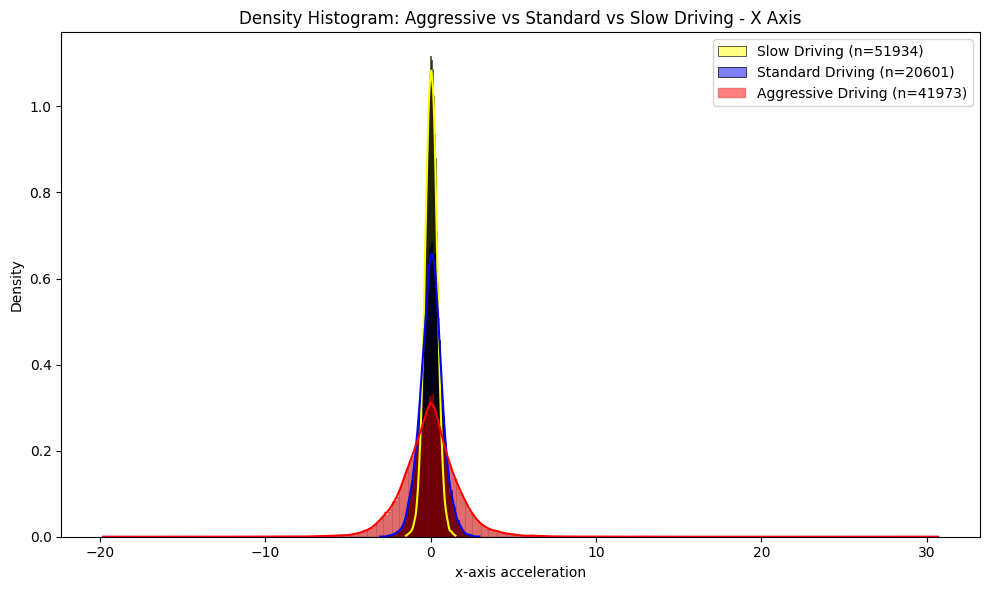

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For density plots

# File paths for accelerometer data
filename_rush = r"/content/Data/DrivingBehaviour/Aggressive_2/Accelerometer.csv"
filename_normal = r"/content/Data/DrivingBehaviour/Normal/Accelerometer.csv"
filename_slow = r"/content/Data/DrivingBehaviour/Slow/Accelerometer.csv"

# Output directory for saving plots
output_dir = r"/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Statistical_Validation"

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Load accelerometer data
data_rush = load_data(filename_rush)
data_normal = load_data(filename_normal)
data_slow = load_data(filename_slow)

# Function to clean data
def clean_data(data, column='x', lower_limit=-1.5, upper_limit=1.5):
    # Remove data points outside the specified limits
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# Clean the data
data_slow = clean_data(data_slow)

# Function to plot density histograms
def plot_density_histograms(data_rush, data_normal, data_slow, column='x', output_dir=output_dir):
    plt.figure(figsize=(10, 6))

    # Normalize histograms by dividing by the total number of samples
    total_rush = len(data_rush)
    total_normal = len(data_normal)
    total_slow = len(data_slow)

    # Density plot for Slow Driving
    sns.histplot(data_slow[column], kde=True, color='yellow', label=f'Slow Driving (n={total_slow})', stat='density')

    # Density plot for Normal Driving
    sns.histplot(data_normal[column], kde=True, color='blue', label=f'Standard Driving (n={total_normal})', stat='density')

    # Density plot for Rush Driving
    sns.histplot(data_rush[column], kde=True, color='red', label=f'Aggressive Driving (n={total_rush})', stat='density')

    plt.title(f'Density Histogram: Aggressive vs Standard vs Slow Driving - {column.upper()} Axis')
    plt.xlabel(f'{column}-axis acceleration')
    plt.ylabel('Density')
    plt.legend()

    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(f'{output_dir}/density_histogram_{column}_axis.png')
    plt.show()

# Plot and save density histograms for X-axis
plot_density_histograms(data_rush, data_normal, data_slow, column='x')


<ipython-input-26-4b936d7c6f4a>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Behavior', y='x', data=combined_data, palette='Set2')


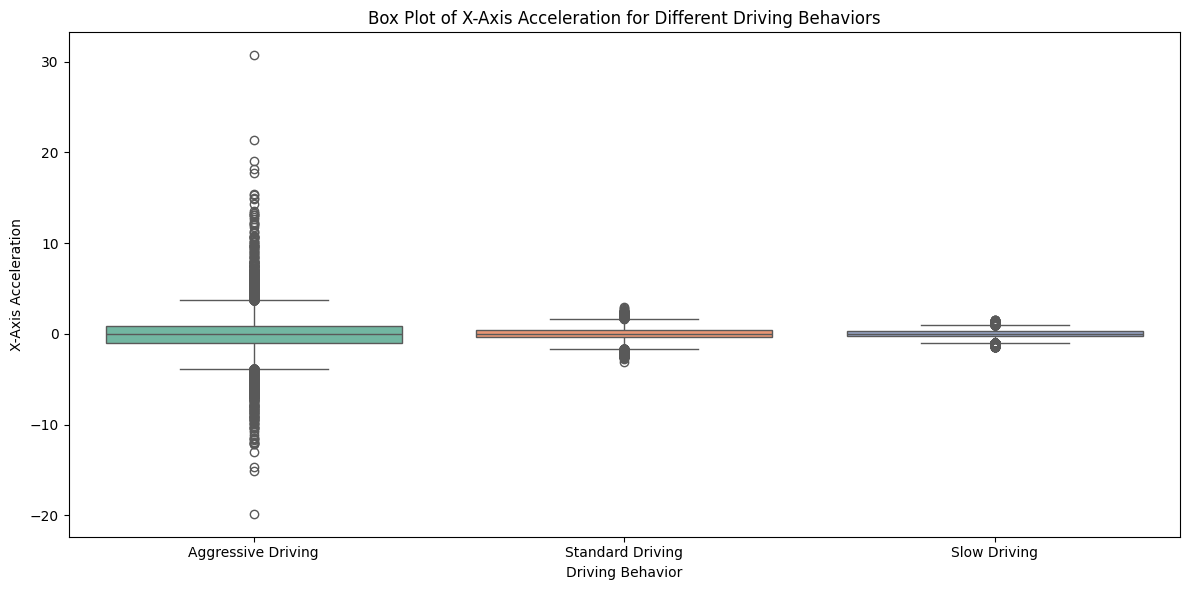

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For box plots

# File paths for accelerometer data
filename_rush = r"/content/Data/DrivingBehaviour/Aggressive_2/Accelerometer.csv"
filename_normal = r"/content/Data/DrivingBehaviour/Normal/Accelerometer.csv"
filename_slow = r"/content/Data/DrivingBehaviour/Slow/Accelerometer.csv"

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Load accelerometer data
data_rush = load_data(filename_rush)
data_normal = load_data(filename_normal)
data_slow = load_data(filename_slow)

# Function to clean slow driving data
def clean_slow_data(data, column='x', lower_limit=-1.5, upper_limit=1.5):
    # Remove data points outside the specified limits
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# Clean slow driving data
data_slow = clean_slow_data(data_slow)

# Create a DataFrame to combine all driving behaviors for plotting
data_rush['Behavior'] = 'Aggressive Driving'
data_normal['Behavior'] = 'Standard Driving'
data_slow['Behavior'] = 'Slow Driving'

# Combine data into one DataFrame
combined_data = pd.concat([data_rush[['x', 'Behavior']],
                           data_normal[['x', 'Behavior']],
                           data_slow[['x', 'Behavior']]])

# Plot box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Behavior', y='x', data=combined_data, palette='Set2')

# Add titles and labels
plt.title('Box Plot of X-Axis Acceleration for Different Driving Behaviors')
plt.xlabel('Driving Behavior')
plt.ylabel('X-Axis Acceleration')

# Save the plot
output_dir = r'/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Statistical_Validation'
plt.tight_layout()
plt.savefig(f'{output_dir}/boxplot_x_axis_acceleration.png')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# File paths for accelerometer data
filename_rush = r"/content/Data/DrivingBehaviour/Aggressive_2/Accelerometer.csv"
filename_normal = r"/content/Data/DrivingBehaviour/Normal/Accelerometer.csv"
filename_slow = r"/content/Data/DrivingBehaviour/Slow/Accelerometer.csv"

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Load accelerometer data
data_rush = load_data(filename_rush)
data_normal = load_data(filename_normal)
data_slow = load_data(filename_slow)

# Function to clean data
def clean_data(data, column='x', lower_limit=-1.5, upper_limit=1.5):
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# Clean the data
data_rush = clean_data(data_rush)
data_normal = clean_data(data_normal)
data_slow = clean_data(data_slow)

# Extract x-axis readings
signal_rush = data_rush['x'].values
signal_normal = data_normal['x'].values
signal_slow = data_slow['x'].values

# Function to compute and plot cross-correlation with a specified sample range
def plot_cross_correlation(signal1, signal2, label1, label2, output_dir, filename, start=0, end=20000):
    # Ensure the end index does not exceed the length of the shorter signal
    end = min(end, min(len(signal1), len(signal2)))

    # Slice signals and compute cross-correlation for the specified range
    signal1_range = signal1[start:end]
    signal2_range = signal2[start:end]

    # Compute cross-correlation
    cross_corr = np.correlate(signal1_range, signal2_range, mode='full')
    lags = np.arange(-len(signal2_range) + 1, len(signal1_range))

    # Find the maximum cross-correlation value and the corresponding lag
    max_corr = np.max(cross_corr)
    max_corr_lag = lags[np.argmax(cross_corr)]

    print(f"Maximum Cross-correlation Value between {label1} and {label2}: {max_corr}")
    print(f"Lag at Maximum Cross-correlation Value between {label1} and {label2}: {max_corr_lag}\n")

    # Plot signals and cross-correlation
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot signal 1
    ax1.plot(np.arange(start, end), signal1_range, label=f'{label1} - Accelerometer X axis Signal', color='blue')
    # Plot signal 2
    ax1.plot(np.arange(start, end), signal2_range, label=f'{label2} - Accelerometer X axis Signal', color='orange')
    ax1.set_xlabel('Sample')
    ax1.set_ylabel('Signal Amplitude')
    ax1.legend(loc='upper left')

    # Creating a secondary y-axis to plot cross-correlation
    ax2 = ax1.twinx()
    # Plotting cross-correlation with correct lags
    ax2.plot(lags, cross_corr, label='Cross-correlation', color='green')
    ax2.set_ylabel('Cross-correlation')
    ax2.legend(loc='upper right')

    plt.title(f'X-Axis Signals and Cross-correlation: {label1} vs {label2}')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename))
    plt.close()

# Define output directory
output_dir = r'/content/drive/MyDrive/Road_Data/Output_Images/Analyzing_Driving_Behavior/Statistical_Validation'

# Plot cross-correlation between different driving behaviors for the range 0-20000
plot_cross_correlation(signal_rush, signal_normal, 'Aggressive Driving', 'Standard Driving', output_dir, 'cross_correlation_rush_vs_normal.png')
plot_cross_correlation(signal_rush, signal_slow, 'Aggressive Driving', 'Slow Driving', output_dir, 'cross_correlation_rush_vs_slow.png')
plot_cross_correlation(signal_normal, signal_slow, 'Standard Driving', 'Slow Driving', output_dir, 'cross_correlation_normal_vs_slow.png')


Maximum Cross-correlation Value between Aggressive Driving and Standard Driving: 290.5453436998754
Lag at Maximum Cross-correlation Value between Aggressive Driving and Standard Driving: -4740

Maximum Cross-correlation Value between Aggressive Driving and Slow Driving: 237.74311258644184
Lag at Maximum Cross-correlation Value between Aggressive Driving and Slow Driving: 3647

Maximum Cross-correlation Value between Standard Driving and Slow Driving: 182.45451806168268
Lag at Maximum Cross-correlation Value between Standard Driving and Slow Driving: 11780



Multivariate Analysis

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu, ks_2samp
import numpy as np
import matplotlib.pyplot as plt

# Load the different sensor CSV files
# Replace these with actual paths to the bump and pothole CSV files for each sensor
accel_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/Accelerometer.csv")
accel_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/Accelerometer.csv")

# (Load other sensor data as previously shown...)

# Preprocessing: Select common fields for merging (timestamp or seconds_elapsed)
sensors_bump = [accel_bump]  # Include other sensors
sensors_pothole = [accel_pothole]  # Include other sensors

# Merge bump and pothole data on 'Seconds elapsed'
bump_combined = sensors_bump[0]
pothole_combined = sensors_pothole[0]

for sensor in sensors_bump[1:]:
    bump_combined = pd.merge(bump_combined, sensor, on="seconds_elapsed", suffixes=("", "_sensor"))

for sensor in sensors_pothole[1:]:
    pothole_combined = pd.merge(pothole_combined, sensor, on="seconds_elapsed", suffixes=("", "_sensor"))

# Add labels for bump and pothole
bump_combined["event"] = "bump"
pothole_combined["event"] = "pothole"

# Combine all data into a single DataFrame
data_combined = pd.concat([bump_combined, pothole_combined], ignore_index=True)

# Statistical Analysis
# Select features (x, y, z axis readings) from each sensor for analysis
feature_columns = [col for col in data_combined.columns if any(axis in col for axis in ['x', 'y', 'z'])]

# Mann-Whitney U Test and Kolmogorov-Smirnov Test
results_mannwhitney = {}
results_ks = {}

for feature in feature_columns:
    bump_values = data_combined[data_combined["event"] == "bump"][feature].dropna()
    pothole_values = data_combined[data_combined["event"] == "pothole"][feature].dropna()

    # Mann-Whitney U Test
    if len(bump_values) > 0 and len(pothole_values) > 0:
        u_stat, mw_p_val = mannwhitneyu(bump_values, pothole_values, alternative='two-sided')
        results_mannwhitney[feature] = {'U_stat': u_stat, 'p_value': mw_p_val}

    # Kolmogorov-Smirnov Test
    if len(bump_values) > 0 and len(pothole_values) > 0:
        ks_stat, ks_p_val = ks_2samp(bump_values, pothole_values)
        results_ks[feature] = {'KS_stat': ks_stat, 'p_value': ks_p_val}

# Display significant features for Mann-Whitney U Test
significant_features_mannwhitney = {k: v for k, v in results_mannwhitney.items() if v['p_value'] < 0.05}
print("Significant Features (Mann-Whitney U Test, p < 0.05):", significant_features_mannwhitney)

# Display significant features for Kolmogorov-Smirnov Test
significant_features_ks = {k: v for k, v in results_ks.items() if v['p_value'] < 0.05}
print("Significant Features (Kolmogorov-Smirnov Test, p < 0.05):", significant_features_ks)

# Define the path to save plots
save_path = "/content/drive/MyDrive/Road_Data/Output_Images/Multivariate_Analysis"  # Change to your desired folder in Google Drive

# Visualization (optional): Plot data distributions for significant features
for feature in significant_features_mannwhitney:
    plt.figure()
    data_combined[data_combined["event"] == "bump"][feature].hist(alpha=0.5, label="Bump")
    data_combined[data_combined["event"] == "pothole"][feature].hist(alpha=0.5, label="Pothole")
    plt.title(f"{feature} Distribution (Mann-Whitney U Test)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.savefig(f"{save_path}{feature}_mannwhitney.png")  # Save the plot
    plt.close()  # Close the plot to free up memory

for feature in significant_features_ks:
    plt.figure()
    data_combined[data_combined["event"] == "bump"][feature].hist(alpha=0.5, label="Bump")
    data_combined[data_combined["event"] == "pothole"][feature].hist(alpha=0.5, label="Pothole")
    plt.title(f"{feature} Distribution (Kolmogorov-Smirnov Test)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.savefig(f"{save_path}{feature}_ks.png")  # Save the plot
    plt.close()  # Close the plot to free up memory


Significant Features (Mann-Whitney U Test, p < 0.05): {'z': {'U_stat': 236269.0, 'p_value': 0.00015209194590888164}, 'y': {'U_stat': 69342.0, 'p_value': 6.27465358030755e-97}, 'x': {'U_stat': 166700.0, 'p_value': 8.138393979064622e-11}}
Significant Features (Kolmogorov-Smirnov Test, p < 0.05): {'z': {'KS_stat': 0.10953688692882287, 'p_value': 0.0007569317628893185}, 'y': {'KS_stat': 0.6672046826378291, 'p_value': 2.8716803963877325e-137}, 'x': {'KS_stat': 0.20167528679020463, 'p_value': 5.379593550281946e-12}}


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu, ks_2samp
import numpy as np
import matplotlib.pyplot as plt

# Load the different sensor CSV files
# Replace these with actual paths to the bump and pothole CSV files for each sensor

accelT_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/TotalAcceleration.csv")
accelT_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/TotalAcceleration.csv")


# (Load other sensor data as previously shown...)

# Preprocessing: Select common fields for merging (timestamp or seconds_elapsed)
sensors_bump = [accelT_bump]
sensors_pothole = [accelT_pothole]

# Merge bump and pothole data on 'Seconds elapsed'
bump_combined = sensors_bump[0]
pothole_combined = sensors_pothole[0]

for sensor in sensors_bump[1:]:
    bump_combined = pd.merge(bump_combined, sensor, on="seconds_elapsed", suffixes=("", "_sensor"))

for sensor in sensors_pothole[1:]:
    pothole_combined = pd.merge(pothole_combined, sensor, on="seconds_elapsed", suffixes=("", "_sensor"))

# Add labels for bump and pothole
bump_combined["event"] = "bump"
pothole_combined["event"] = "pothole"

# Combine all data into a single DataFrame
data_combined = pd.concat([bump_combined, pothole_combined], ignore_index=True)

# Statistical Analysis
# Select features (x, y, z axis readings) from each sensor for analysis
feature_columns = [col for col in data_combined.columns if any(axis in col for axis in ['x', 'y', 'z'])]

# Mann-Whitney U Test and Kolmogorov-Smirnov Test
results_mannwhitney = {}
results_ks = {}

for feature in feature_columns:
    bump_values = data_combined[data_combined["event"] == "bump"][feature].dropna()
    pothole_values = data_combined[data_combined["event"] == "pothole"][feature].dropna()

    # Mann-Whitney U Test
    if len(bump_values) > 0 and len(pothole_values) > 0:
        u_stat, mw_p_val = mannwhitneyu(bump_values, pothole_values, alternative='two-sided')
        results_mannwhitney[feature] = {'U_stat': u_stat, 'p_value': mw_p_val}

    # Kolmogorov-Smirnov Test
    if len(bump_values) > 0 and len(pothole_values) > 0:
        ks_stat, ks_p_val = ks_2samp(bump_values, pothole_values)
        results_ks[feature] = {'KS_stat': ks_stat, 'p_value': ks_p_val}

# Display significant features for Mann-Whitney U Test
significant_features_mannwhitney = {k: v for k, v in results_mannwhitney.items() if v['p_value'] < 0.05}
print("Significant Features (Mann-Whitney U Test, p < 0.05):", significant_features_mannwhitney)

# Display significant features for Kolmogorov-Smirnov Test
significant_features_ks = {k: v for k, v in results_ks.items() if v['p_value'] < 0.05}
print("Significant Features (Kolmogorov-Smirnov Test, p < 0.05):", significant_features_ks)

# Define the path to save plots
save_path = "/content/drive/MyDrive/Road_Data/Output_Images/Multivariate_Analysis"  # Change to your desired folder in Google Drive

# Visualization (optional): Plot data distributions for significant features
for feature in significant_features_mannwhitney:
    plt.figure()
    data_combined[data_combined["event"] == "bump"][feature].hist(alpha=0.5, label="Bump")
    data_combined[data_combined["event"] == "pothole"][feature].hist(alpha=0.5, label="Pothole")
    plt.title(f"{feature} Distribution (Mann-Whitney U Test)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.savefig(f"{save_path}{feature}_mannwhitney.png")  # Save the plot
    plt.close()  # Close the plot to free up memory

for feature in significant_features_ks:
    plt.figure()
    data_combined[data_combined["event"] == "bump"][feature].hist(alpha=0.5, label="Bump")
    data_combined[data_combined["event"] == "pothole"][feature].hist(alpha=0.5, label="Pothole")
    plt.title(f"{feature} Distribution (Kolmogorov-Smirnov Test)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.savefig(f"{save_path}{feature}_ks.png")  # Save the plot
    plt.close()  # Close the plot to free up memory


Significant Features (Mann-Whitney U Test, p < 0.05): {'y': {'U_stat': 232501.5, 'p_value': 0.0012352491114918254}, 'x': {'U_stat': 190336.5, 'p_value': 0.002670015027892114}}
Significant Features (Kolmogorov-Smirnov Test, p < 0.05): {'y': {'KS_stat': 0.20726274089071708, 'p_value': 1.1591607230115344e-12}, 'x': {'KS_stat': 0.11342246992055562, 'p_value': 0.0004348031238805656}}


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import mannwhitneyu, ks_2samp

# Load each sensor CSV file (example with accelerometer and gyroscope; add others as needed)
accel_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/Accelerometer.csv")
accel_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/Accelerometer.csv")

accelU_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/AccelerometerUncalibrated.csv")
accelU_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/AccelerometerUncalibrated.csv")

accelT_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/TotalAcceleration.csv")
accelT_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/TotalAcceleration.csv")

gyro_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/Gyroscope.csv")
gyro_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/Gyroscope.csv")

gyroU_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/GyroscopeUncalibrated.csv")
gyroU_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/GyroscopeUncalibrated.csv")

magneto_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/Magnetometer.csv")
magneto_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/Magnetometer.csv")

magnetoU_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/MagnetometerUncalibrated.csv")
magnetoU_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/MagnetometerUncalibrated.csv")

orientation_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/Orientation.csv")
orientation_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/Orientation.csv")

gravity_bump = pd.read_csv("/content/RData/RoadAnomalies/3.Bump/Gravity.csv")
gravity_pothole = pd.read_csv("/content/RData/RoadAnomalies/13.Pothole/Gravity.csv")

# List of dataframes for bump and pothole data
bump_dfs = [accel_bump.add_suffix('_accel'),
            accelU_bump.add_suffix('_accelU'),
            accelT_bump.add_suffix('_accelT'),
            gyro_bump.add_suffix('_gyro'),
            gyroU_bump.add_suffix('_gyroU'),
            magneto_bump.add_suffix('_magneto'),
            magnetoU_bump.add_suffix('_magnetoU'),
            orientation_bump.add_suffix('_orientation'),
            gravity_bump.add_suffix('_gravity')]

pothole_dfs = [accel_pothole.add_suffix('_accel'),
               accelU_pothole.add_suffix('_accelU'),
               accelT_pothole.add_suffix('_accelT'),
               gyro_pothole.add_suffix('_gyro'),
               gyroU_pothole.add_suffix('_gyroU'),
               magneto_pothole.add_suffix('_magnetoU'),
               magnetoU_pothole.add_suffix('_magneto'),
               orientation_pothole.add_suffix('_orientation'),
               gravity_pothole.add_suffix('_gravity')]

# Add 'seconds_elapsed' back to the dataframes for merging
for df in bump_dfs:
    df['seconds_elapsed'] = accel_bump['seconds_elapsed']

for df in pothole_dfs:
    df['seconds_elapsed'] = accel_pothole['seconds_elapsed']

# Merge bump data on 'seconds_elapsed' field
bump_combined = bump_dfs[0]
for df in bump_dfs[1:]:
    bump_combined = pd.merge(bump_combined, df, on="seconds_elapsed", how="outer")

# Merge pothole data on 'seconds_elapsed' field
pothole_combined = pothole_dfs[0]
for df in pothole_dfs[1:]:
    pothole_combined = pd.merge(pothole_combined, df, on="seconds_elapsed", how="outer")

# Add event labels for classification
bump_combined["event"] = "bump"
pothole_combined["event"] = "pothole"

# Concatenate the bump and pothole data for PCA analysis
data_combined = pd.concat([bump_combined, pothole_combined], ignore_index=True)

# Select only sensor-related features (e.g., x, y, z values for accelerometer and gyroscope)
feature_columns = [col for col in data_combined.columns if any(axis in col for axis in ['x', 'y', 'z'])]
sensor_data = data_combined[feature_columns]

# Drop rows with NaN values
sensor_data = sensor_data.dropna()  # Option 1: Drop rows with NaN values

# Apply PCA to reduce dimensions while keeping key variance
pca = PCA(n_components=3)  # Adjust n_components based on variance explained by PCA
principal_components = pca.fit_transform(sensor_data)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2', 'PCA3'])
data_combined = pd.concat([data_combined, pca_df], axis=1)

# Statistical Analysis with PCA Features
results_mannwhitney = {}
results_ks = {}

for component in ['PCA1', 'PCA2', 'PCA3']:
    bump_values = data_combined[data_combined["event"] == "bump"][component].dropna()
    pothole_values = data_combined[data_combined["event"] == "pothole"][component].dropna()

    # Mann-Whitney U Test
    if len(bump_values) > 0 and len(pothole_values) > 0:
        u_stat, mw_p_val = mannwhitneyu(bump_values, pothole_values, alternative='two-sided')
        results_mannwhitney[component] = {'U_stat': u_stat, 'p_value': mw_p_val}

    # Kolmogorov-Smirnov Test
    if len(bump_values) > 0 and len(pothole_values) > 0:
        ks_stat, ks_p_val = ks_2samp(bump_values, pothole_values)
        results_ks[component] = {'KS_stat': ks_stat, 'p_value': ks_p_val}

# Display significant features for Mann-Whitney U Test
significant_features_mannwhitney = {k: v for k, v in results_mannwhitney.items() if v['p_value'] < 0.05}
print("Significant Features (Mann-Whitney U Test, p < 0.05):", significant_features_mannwhitney)

# Display significant features for Kolmogorov-Smirnov Test
significant_features_ks = {k: v for k, v in results_ks.items() if v['p_value'] < 0.05}
print("Significant Features (Kolmogorov-Smirnov Test, p < 0.05):", significant_features_ks)


Significant Features (Mann-Whitney U Test, p < 0.05): {'PCA1': {'U_stat': 386952.0, 'p_value': 1.1198408511519155e-158}, 'PCA2': {'U_stat': 392129.0, 'p_value': 8.075341724723514e-168}, 'PCA3': {'U_stat': 230861.0, 'p_value': 0.0003726204633519691}}
Significant Features (Kolmogorov-Smirnov Test, p < 0.05): {'PCA1': {'KS_stat': 0.9346666666666666, 'p_value': 7.392128635545988e-305}, 'PCA2': {'KS_stat': 0.9466666666666667, 'p_value': 1.9114522e-316}}


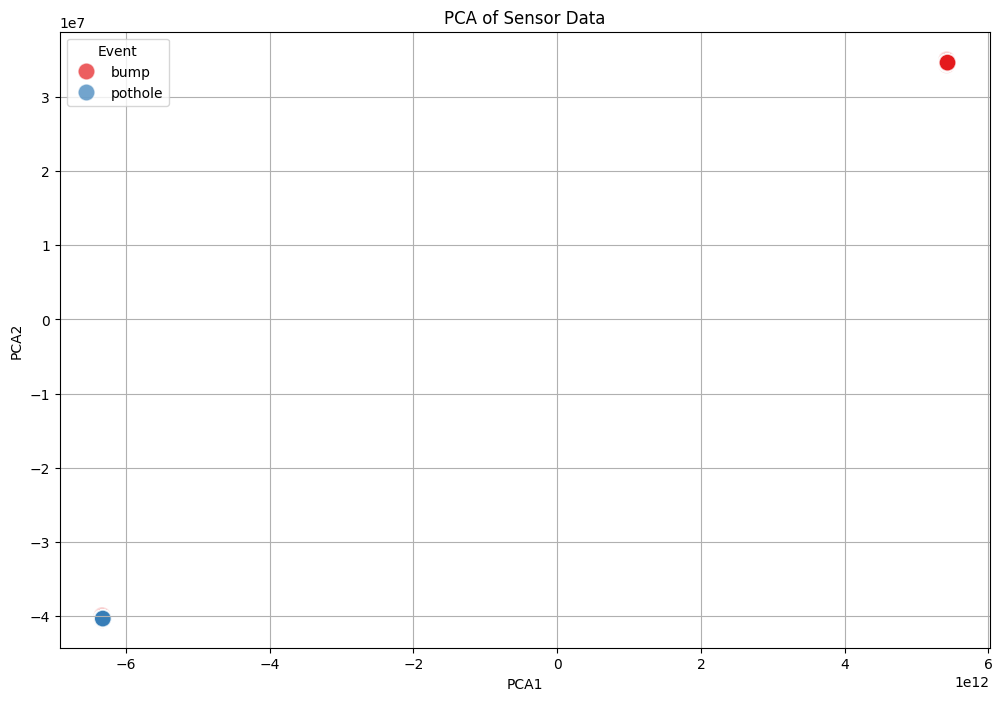

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting PCA Results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_combined, x='PCA1', y='PCA2', hue='event', palette='Set1', alpha=0.7, s=150)  # Adjust 's' for marker size
plt.title('PCA of Sensor Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Event')
plt.grid(True)

# Save the plot
plt.savefig('/content/drive/MyDrive/Road_Data/Output_Images/Multivariate_Analysis/PCAofSensor.png')
plt.show()


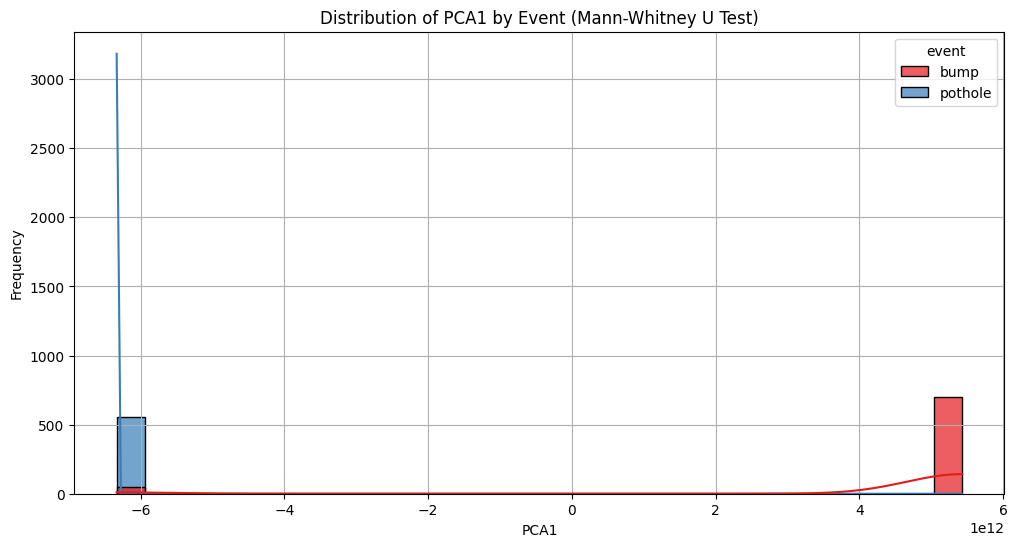

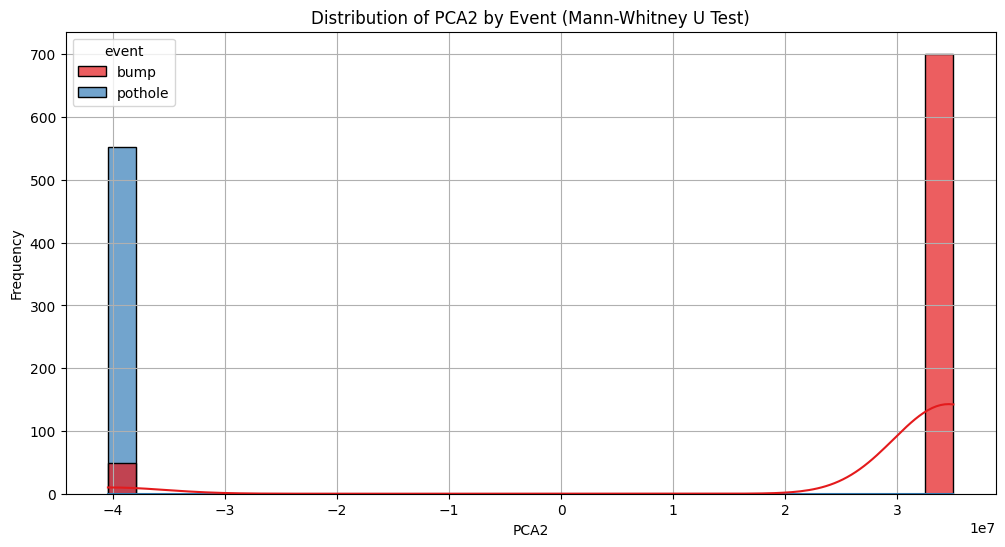

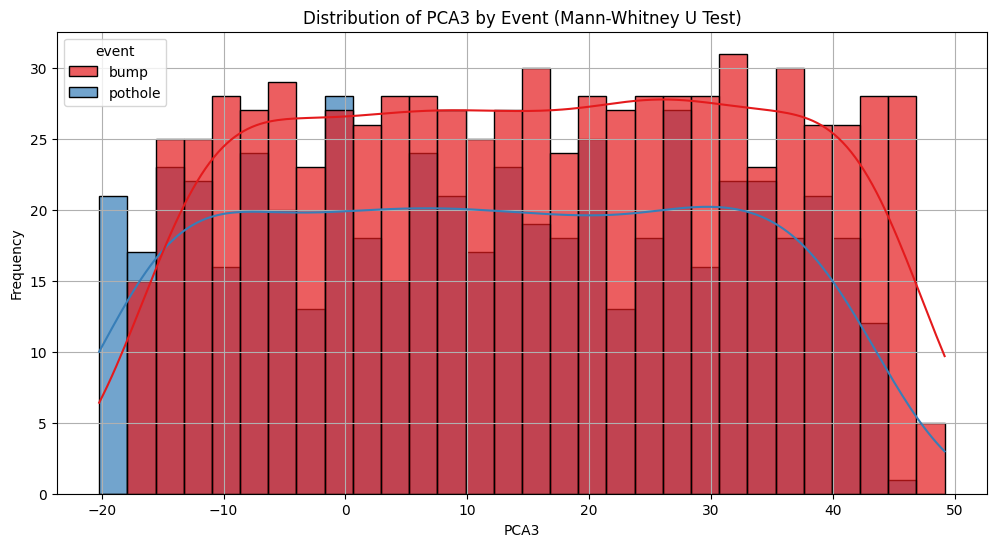

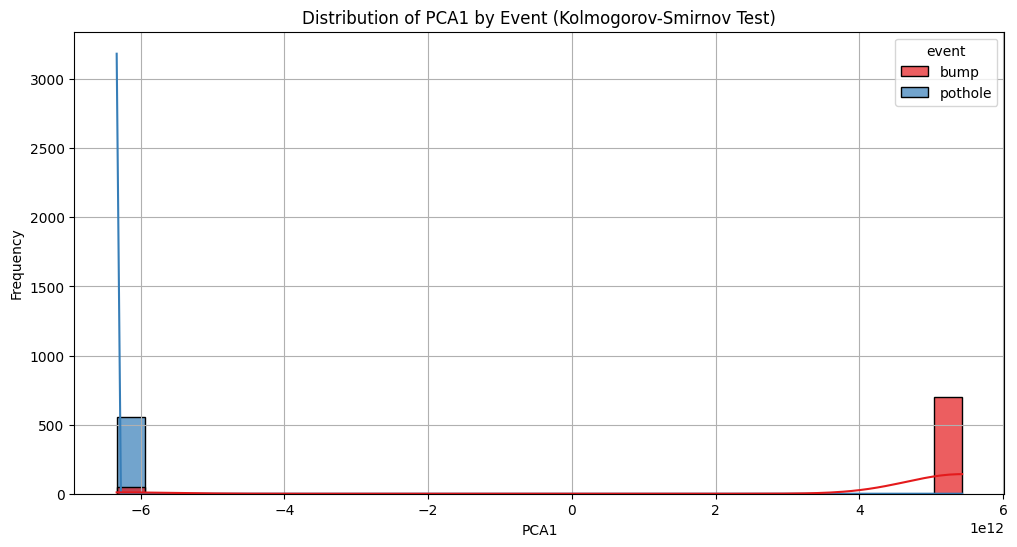

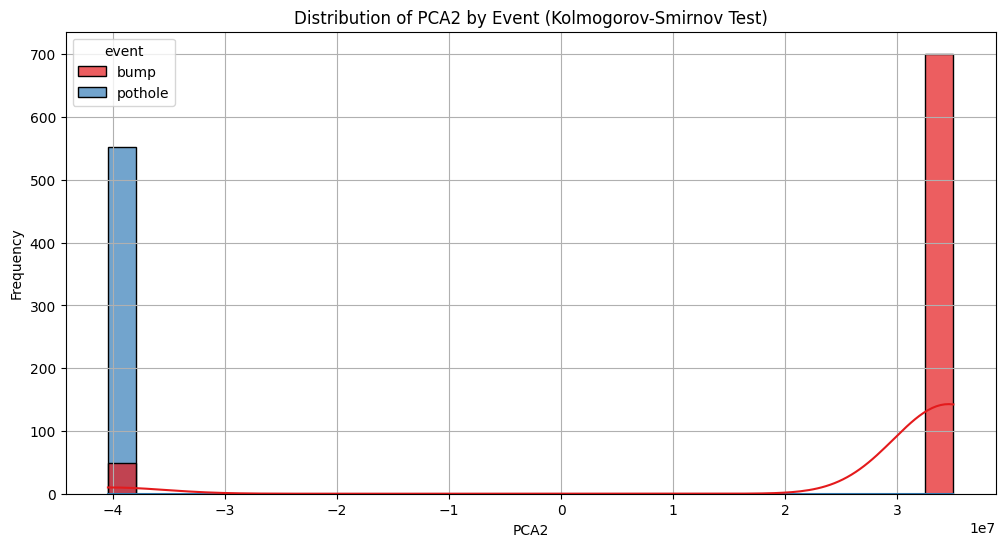

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import mannwhitneyu, ks_2samp

# Visualization of significant features for Mann-Whitney U Test (Histograms)
for component in significant_features_mannwhitney.keys():
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data_combined, x=component, hue='event', kde=True, bins=30, palette='Set1', alpha=0.7)
    plt.title(f'Distribution of {component} by Event (Mann-Whitney U Test)')
    plt.xlabel(component)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Save the histogram plot
    plt.savefig(f'/content/drive/MyDrive/Road_Data/Output_Images/Multivariate_Analysis/{component}_MW_Test_Histogram.png')
    plt.show()

# Visualization of significant features for Kolmogorov-Smirnov Test (Histograms)
for component in significant_features_ks.keys():
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data_combined, x=component, hue='event', kde=True, bins=30, palette='Set1', alpha=0.7)
    plt.title(f'Distribution of {component} by Event (Kolmogorov-Smirnov Test)')
    plt.xlabel(component)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Save the histogram plot
    plt.savefig(f'/content/drive/MyDrive/Road_Data/Output_Images/Multivariate_Analysis/{component}_KS_Test_Histogram.png')
    plt.show()

In [ ]:
# Path to save plots
save_path = '/content/drive/MyDrive/Road_Data/Output_Images/Multivariate_Analysis/'

# Visualization for significant features from Mann-Whitney U Test
for feature in significant_features_mannwhitney:
    plt.figure(figsize=(12, 6))
    # Plot histograms for bump and pothole events
    bump_data = data_combined[data_combined["event"] == "bump"][feature]
    pothole_data = data_combined[data_combined["event"] == "pothole"][feature]

    # Check if there's data for both events
    if not bump_data.empty:
        bump_data.hist(alpha=0.5, label="Bump", bins=30, color='blue')
    if not pothole_data.empty:
        pothole_data.hist(alpha=0.5, label="Pothole", bins=30, color='orange')

    plt.title(f"{feature} Distribution (Mann-Whitney U Test)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig(f"{save_path}{feature}_mannwhitney.png")
    plt.close()  # Close the plot to free up memory

# Visualization for significant features from Kolmogorov-Smirnov Test
for feature in significant_features_ks:
    plt.figure(figsize=(12, 6))
    # Plot histograms for bump and pothole events
    bump_data = data_combined[data_combined["event"] == "bump"][feature]
    pothole_data = data_combined[data_combined["event"] == "pothole"][feature]

    # Check if there's data for both events
    if not bump_data.empty:
        bump_data.hist(alpha=0.5, label="Bump", bins=30, color='blue')
    if not pothole_data.empty:
        pothole_data.hist(alpha=0.5, label="Pothole", bins=30, color='orange')

    plt.title(f"{feature} Distribution (Kolmogorov-Smirnov Test)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig(f"{save_path}{feature}_ks.png")
    plt.close()  # Close the plot to free up memory


In [ ]:
import seaborn as sns

for feature in significant_features_mannwhitney:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=data_combined[data_combined["event"] == "bump"][feature], label="Bump", color='blue', fill=True, alpha=0.5)
    sns.kdeplot(data=data_combined[data_combined["event"] == "pothole"][feature], label="Pothole", color='orange', fill=True, alpha=0.5)

    plt.title(f"{feature} Distribution (Mann-Whitney U Test)")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig(f"{save_path}{feature}_mannwhitney.png")
    plt.close()  # Close the plot to free up memory


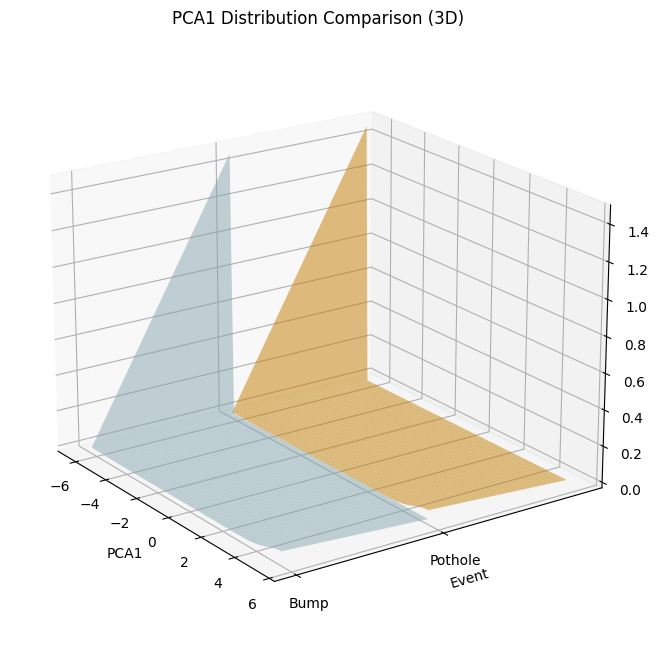

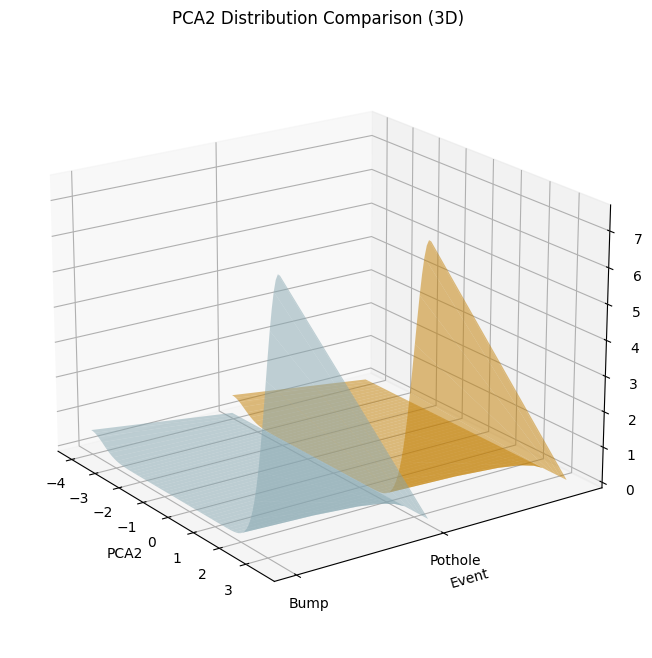

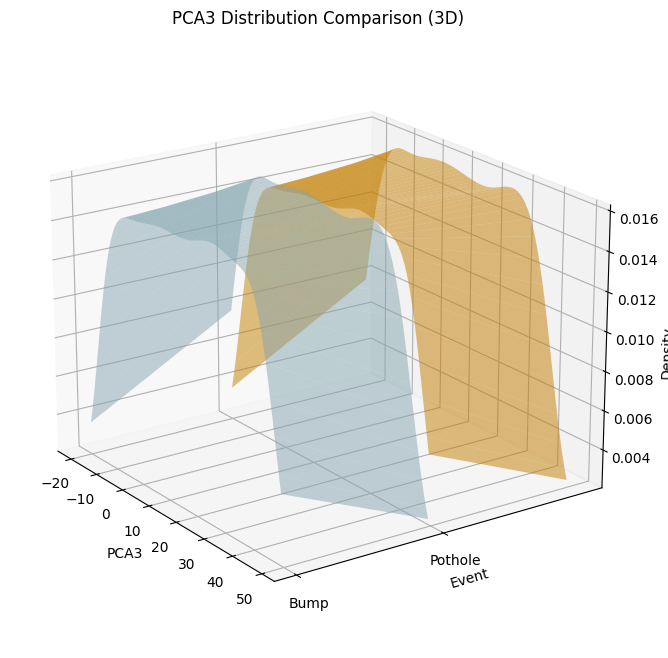

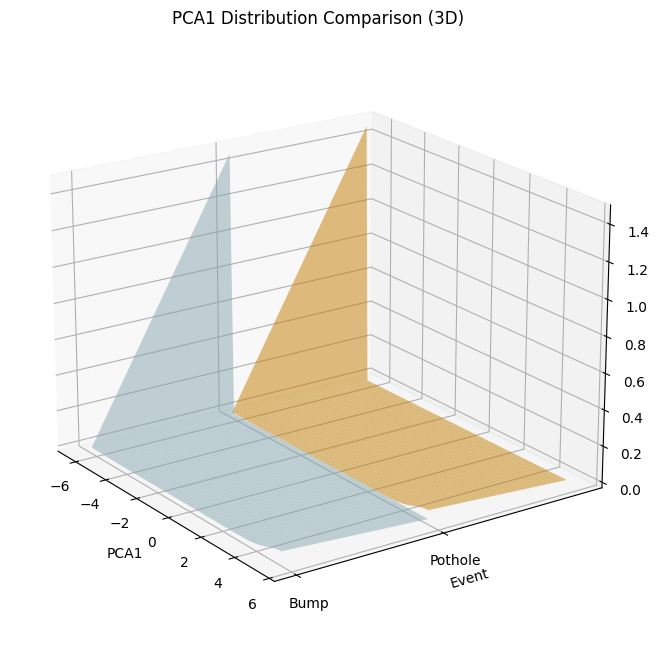

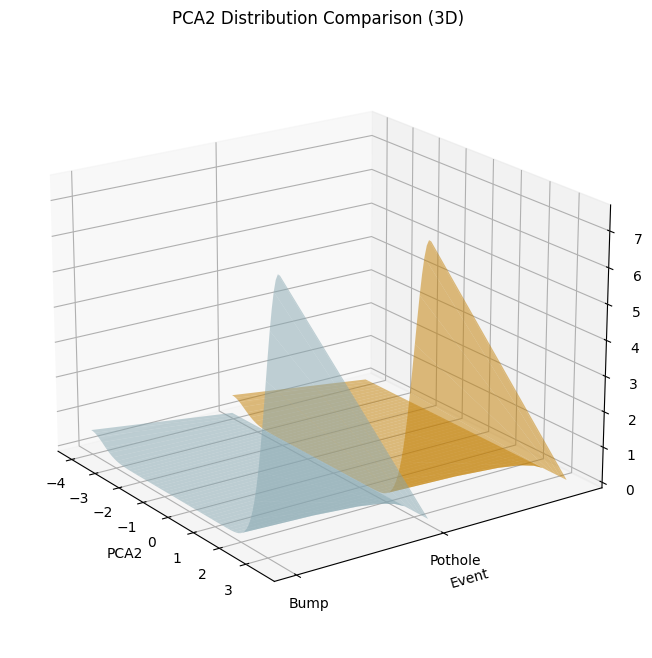

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

# Path to save plots
save_path = '/content/drive/MyDrive/Road_Data/Output_Images/Multivariate_Analysis/'

# Overlayed 3D Density Plots for significant features
for feature in combined_significant_features:
    # Prepare data for bump and pothole events
    bump_data = data_combined[data_combined["event"] == "bump"][feature].dropna()
    pothole_data = data_combined[data_combined["event"] == "pothole"][feature].dropna()

    # Create a grid for the KDE
    x = np.linspace(data_combined[feature].min(), data_combined[feature].max(), 100)

    # Compute KDE for bump and pothole
    bump_kde = gaussian_kde(bump_data)
    pothole_kde = gaussian_kde(pothole_data)

    # Evaluate the density over the grid
    bump_density = bump_kde(x)
    pothole_density = pothole_kde(x)

    # Create a new figure for the 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Prepare a meshgrid for the X values and the corresponding densities
    X, Y = np.meshgrid(x, [0, 1])  # Y will be 0 for bump and 1 for pothole
    Z = np.zeros_like(X)

    # Assign the densities to their corresponding Z values
    Z[0, :] = bump_density  # Bump density
    Z[1, :] = pothole_density  # Pothole density

    # Plot the density distributions in 3D using plot_surface
    ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.5, label='Bump', zorder=1)
    ax.plot_surface(X, Y + 1, Z, color='orange', alpha=0.5, label='Pothole', zorder=2)

    # Set plot title and labels
    ax.set_title(f"{feature} Distribution Comparison (3D)")
    ax.set_xlabel(feature)
    ax.set_ylabel("Event")
    ax.set_zlabel("Density")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Bump', 'Pothole'])
    ax.view_init(elev=20, azim=-35)  # Adjust viewing angle

    # Save the plot
    plt.savefig(f"{save_path}{feature}_density_comparison_3D.png")
    plt.show()
    plt.close()


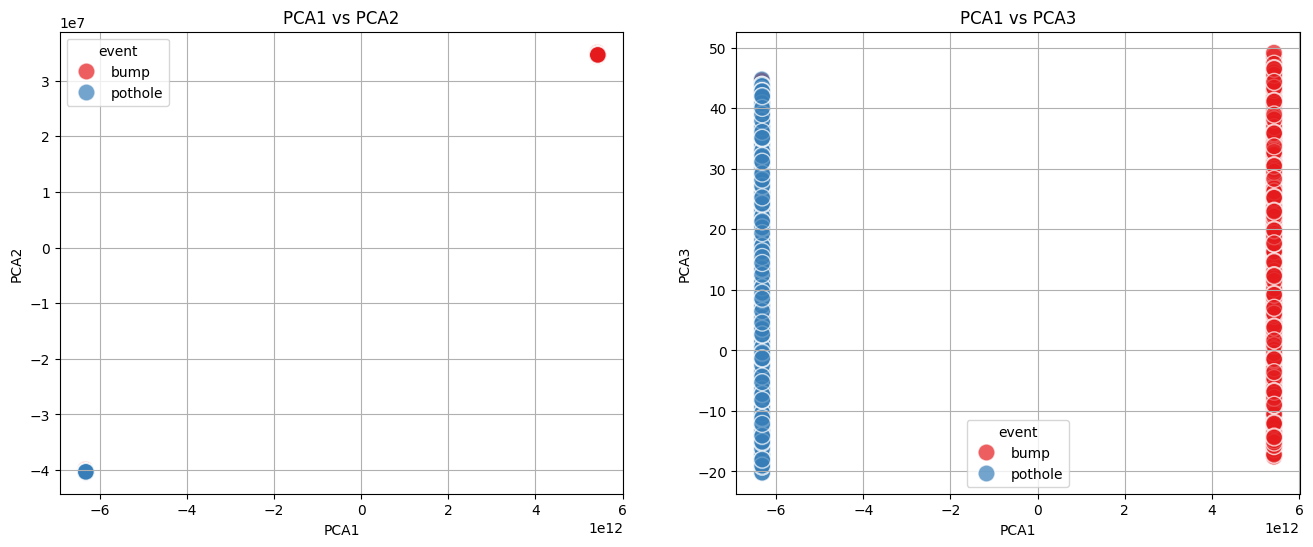

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for PCA1 vs PCA2
sns.scatterplot(data=data_combined, x='PCA1', y='PCA2', hue='event', palette='Set1', alpha=0.7, s=150, ax=axes[0])
axes[0].set_title('PCA1 vs PCA2')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')
axes[0].grid(True)

# Scatter plot for PCA1 vs PCA3 (if PCA3 is available)
sns.scatterplot(data=data_combined, x='PCA1', y='PCA3', hue='event', palette='Set1', alpha=0.7, s=150, ax=axes[1])
axes[1].set_title('PCA1 vs PCA3')
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA3')
axes[1].grid(True)

# Save the plot
plt.savefig('/content/drive/MyDrive/Road_Data/Output_Images/Multivariate_Analysis/PCA1_vs_PCA2_and_PCA3.png')
plt.show()
